<a href="https://colab.research.google.com/github/MagdaliniLytra/Machine-Learning-AI-Master/blob/main/ML_Project8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unzip Dataset Files

In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: dataset/Beagle/Beagle_1.jpg  
  inflating: dataset/Beagle/Beagle_10.jpg  
  inflating: dataset/Beagle/Beagle_100.jpg  
  inflating: dataset/Beagle/Beagle_11.jpg  
  inflating: dataset/Beagle/Beagle_12.jpg  
  inflating: dataset/Beagle/Beagle_13.jpg  
  inflating: dataset/Beagle/Beagle_14.jpg  
  inflating: dataset/Beagle/Beagle_15.jpg  
  inflating: dataset/Beagle/Beagle_16.jpg  
  inflating: dataset/Beagle/Beagle_17.jpg  
  inflating: dataset/Beagle/Beagle_18.jpg  
  inflating: dataset/Beagle/Beagle_19.jpg  
  inflating: dataset/Beagle/Beagle_2.jpg  
  inflating: dataset/Beagle/Beagle_20.jpg  
  inflating: dataset/Beagle/Beagle_21.jpg  
  inflating: dataset/Beagle/Beagle_22.jpg  
  inflating: dataset/Beagle/Beagle_23.jpg  
  inflating: dataset/Beagle/Beagle_24.jpg  
  inflating: dataset/Beagle/Beagle_25.jpg  
  inflating: dataset/Beagle/Beagle_26.jpg  
  inflating: dataset/Beagle/Beagle_27.jpg  
  inflating: dataset/Beagle/Beagle_28.jpg  
  inflating

# Import Libraries

In [ ]:
import os
import PIL
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load and Display Image

In [ ]:
class_names = sorted(os.listdir('dataset'))
class_ids = {label: i for i, label in enumerate(class_names)}
class_ids

{'Beagle': 0,
 'Boxer': 1,
 'Bulldog': 2,
 'Dachshund': 3,
 'German_Shepherd': 4,
 'Golden_Retriever': 5,
 'Labrador_Retriever': 6,
 'Poodle': 7,
 'Rottweiler': 8,
 'Yorkshire_Terrier': 9}

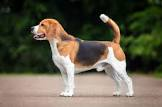

In [ ]:
image_filepath = 'dataset/Beagle/Beagle_1.jpg'
image = PIL.Image.open(image_filepath)
image

# Preprocessing Images

In [ ]:
image_size = (64, 64)

inputs = []
targets = []
for label in class_names:
    for filename in os.listdir(f'dataset/{label}'):
        filepath = f'dataset/{label}/{filename}'
        img = PIL.Image.open(filepath).convert('RGB').resize(image_size)
        inputs.append(img)
        targets.append(class_ids[label])
inputs = np.float32(inputs)
targets = np.int32(targets)

inputs.shape, targets.shape

((967, 64, 64, 3), (967,))

<BarContainer object of 10 artists>

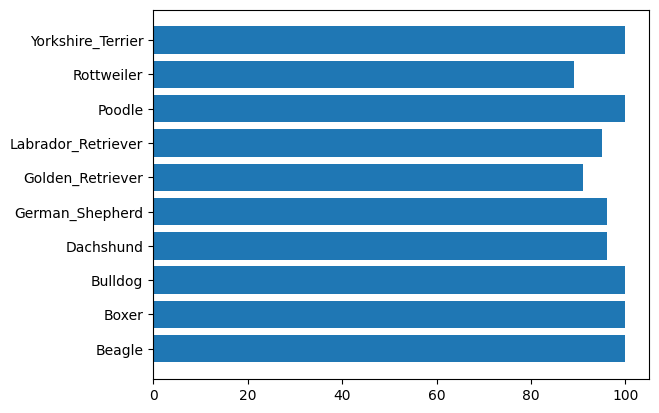

In [ ]:
target_counts = np.unique(targets, return_counts=True)
plt.barh(class_names, target_counts[1])

# Split Inputs into Train-Test

In [ ]:
seed = 0

tf.random.set_seed(seed=seed)
np.random.seed(seed=seed)
random.seed(seed)

In [ ]:
from sklearn.model_selection import train_test_split

test_size = 0.3
stratify = [targets.shape]

x_train, x_test, y_train, y_test = train_test_split(
    inputs,
    targets,
    test_size=0.3,
    stratify=targets,
    random_state=seed
)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((676, 64, 64, 3), (676,), (291, 64, 64, 3), (291,))

In [ ]:
# normalizing inputs in by dividing with 255.0
x_train /= 255.0
x_test /= 255.0
# one hot encoding targets
y_train = np.eye(len(class_names))[y_train]
y_test = np.eye(len(class_names))[y_test]

y_train.shape, y_test.shape

((676, 10), (291, 10))

# Building MLP

* Input: (64, 64, 3) which is flattened into a vector of 12288 size.
* Output: 10 (same as number of classes).

In [ ]:
input_size = x_train.shape[1:]
output_size = len(class_names)

In [ ]:
mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=64, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='MLP')
mlp.summary()

Model: "MLP"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       786,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 791,306 (3.02 MB)

 Trainable params: 791,306 (3.02 MB)

 Non-trainable params: 0 (0.00 B)

The architecture begins with a `Flatten` layer to convert the 3D image grid into a 1D vector. The Dense layer represents a fully connected (or dense) layer, where every neuron in the layer is connected to every neuron in the previous layer. The model has two hidden layers that use 64 neurons each, with `ReLU` activation function (non linear function) , while the `use_bias=True` parameter ensures each neuron can shift its activation threshold to better fit the data and has also an output layer with 10 classes and `softmax` activation function. The `softmax` function is usually used at last layer of neural network which calculates the probabilities distribution of the event over `n` different events. The main advantage of the function is able to handle multiple classes.

In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
mlp.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

# Training MLP

In [ ]:
batch_size = 32
epochs = 30

history = mlp.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.1047 - loss: 3.5623 - val_accuracy: 0.1478 - val_loss: 2.3249
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1955 - loss: 2.2439 - val_accuracy: 0.2199 - val_loss: 2.1578
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2473 - loss: 2.0653 - val_accuracy: 0.3230 - val_loss: 2.0226
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3633 - loss: 1.8927 - val_accuracy: 0.3711 - val_loss: 1.8808
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4315 - loss: 1.7407 - val_accuracy: 0.3780 - val_loss: 1.8002
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5571 - loss: 1.5230 - val_accuracy: 0.4914 - val_loss: 1.5703
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5950 - loss: 1.3655 - val_accuracy: 0.5876 - val_loss: 1.4416
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6432 - loss: 1.2458 - val_accuracy: 0.5979 - val_loss

# Evaluating MLP Model Performance Per Epoch

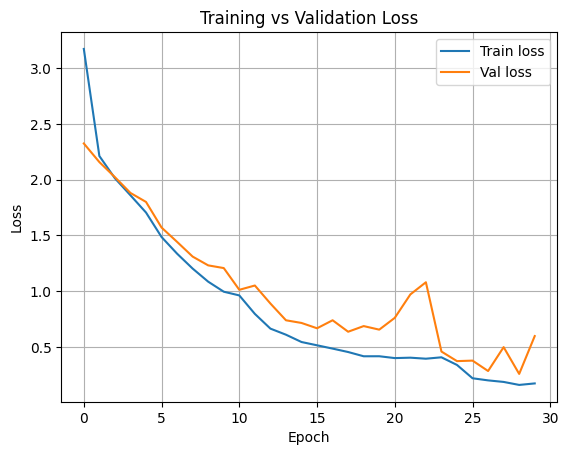

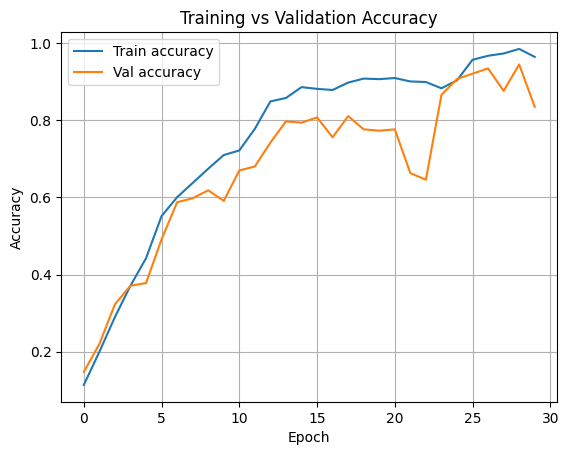

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Building CNN

In [ ]:
cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', use_bias=True),
    tf.keras.layers.Dropout(rate=0.2),

    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', use_bias=True),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units=64, activation='relu', use_bias=True),
    tf.keras.layers.Dense(units=output_size, activation='softmax', use_bias=True)
], name='CNN')
cnn.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 31, 31, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 26912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │     1,722,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,733,226 (6.61 MB)

 Trainable params: 1,733,226 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

# Training CNN

In [ ]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

history = cnn.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 207ms/step - accuracy: 0.1114 - loss: 2.3892 - val_accuracy: 0.2165 - val_loss: 2.2018
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2941 - loss: 2.0872 - val_accuracy: 0.4227 - val_loss: 1.9026
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4765 - loss: 1.6688 - val_accuracy: 0.6392 - val_loss: 1.3420
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7584 - loss: 1.0086 - val_accuracy: 0.8591 - val_loss: 0.7468
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9133 - loss: 0.4446 - val_accuracy: 0.9347 - val_loss: 0.3292
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9715 - loss: 0.1844 - val_accuracy: 0.9107 - val_loss: 0.3840
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9764 - loss: 0.1434 - val_accuracy: 0.9794 - val_loss: 0.1094
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9930 - loss: 0.0595 - val_accuracy: 0.9897 - val_los

# Evaluating CNN Model Performance Per Epoch

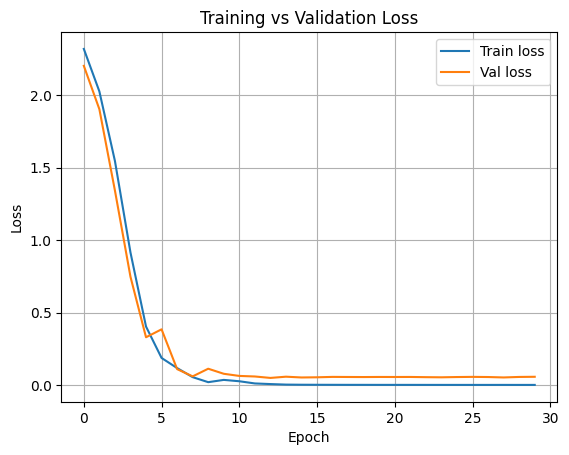

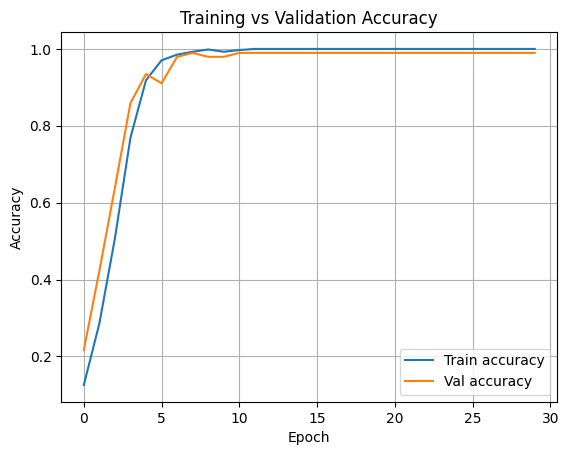

In [ ]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# MLP Model vs CNN Model

MLPs use one perceptron for each input ( pixel in an image) and the amount of weights rapidly becomes unmanageable for large images. It includes too many parameters because it is fully connected. Each node is connected to every other node in next and the previous layer, forming a very dense web, resulting in redundancy and inefficiency. As a result, difficulties arise in training and overfitting can occur which makes it lose the ability to generalize. Also regions of images are not investigated, instead the model attempts to memmorise the input distribution of that region. For example, if a picture of a cat appears in the top left of the image in one picture and the bottom right of another picture, the MLP will try to correct itself and assume that a cat will always appear in this section of the image.

On the other hand CNNs work well with data that has a spatial relationship.
The benefit of using CNNs is their ability to develop an internal representation of a two-dimensional image. This allows the model to learn position and scale in variant structures in the data, which is important when working with images.

# Building Optimised CNN Model

In [44]:
cnn_opt = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_size),

    tf.keras.layers.Conv2D(32, 3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(64, 3, padding='same', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(output_size, activation='softmax')
], name='CNN_with_BatchNormalization')


In [45]:
cnn_opt.summary()


Model: "CNN_with_BatchNormalization"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 64, 64, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 32, 32, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,118,762 (8.08 MB)

 Trainable params: 2,118,314 (8.08 MB)

 Non-trainable params: 448 (1.75 KB)

The original model prioritized speed, using `strides=2` and `valid` (default) padding, which immediately discarded a lot of the input data and ignored edge details. In contrast, the optimized model uses `padding='same'` to keep the image dimensions intact during convolution and replaces strides with `MaxPooling2D` to summarize features rather than skipping them. When `padding="same"` and `strides=1` (default), the output has the same size as the input.

Valid padding is a technique used process the input data without adding any additional rows or columns of pixels around the edges of the data. This means that the size of the output feature map is smaller than the size of the input data. Unlike valid padding, same padding adds additional rows and columns of pixels around the edges of the input data so that the size of the output feature map is the same as the size of the input data.

MaxPooling2D identifies the maximum value of the region and keeps that one, discarding the others.

Also the addition of Batch Normalization, stabilizes the learning process by normalizing layer activations. To improve efficiency, `use_bias=False` was applied to convolutional layers because the normalization process makes the bias redundant. Finally, the model's learning capacity was doubled by increasing filters and dense units and also by raising the `Dropout` rate to 0.4, forcing the network to learn generalized patterns rather than memorizing the training set.

In [46]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
cnn_opt.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])
batch_size = 32
epochs = 30

history = cnn_opt.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 178ms/step - accuracy: 0.3400 - loss: 2.0731 - val_accuracy: 0.1409 - val_loss: 2.2244
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8946 - loss: 0.4880 - val_accuracy: 0.1718 - val_loss: 2.4108
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9828 - loss: 0.2162 - val_accuracy: 0.1615 - val_loss: 2.4812
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.1064 - val_accuracy: 0.1787 - val_loss: 2.5722
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0617 - val_accuracy: 0.1821 - val_loss: 2.6717
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0397 - val_accuracy: 0.1821 - val_loss: 2.7314
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0369 - val_accuracy: 0.1959 - val_loss: 2.6194
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0269 - val_accuracy: 0.2096 - 

# Evaluating Optimised CNN Model Performance Per Epoch

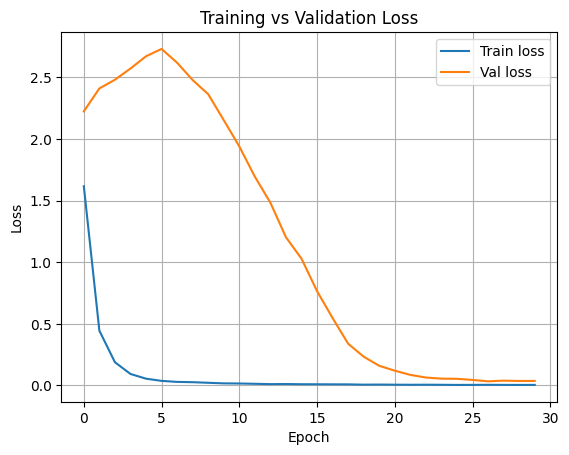

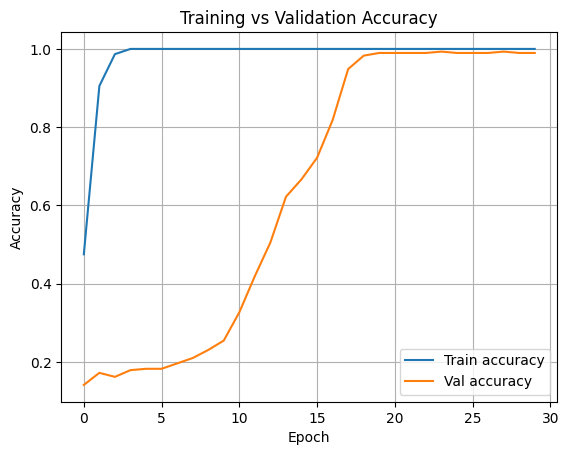

In [47]:
plt.figure()
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

The results show that the validation loss at Epoch 30 in the original model was 0.0565 and in the optimised model the validation loss is 0.0369, so it is lower in the optimised model, that means that the optimised model generalises better  to unseen data.

In the original model, the validation loss stopped improving around Epoch 13 and started going up and down. In the optimised model the loss dropped much more smoothly and reached a lower floor. This indicates that the optimised model finds a more stable set of weights and generalises better.

However both CNN models are indicating overfitting from their performance results.